<a href="https://colab.research.google.com/github/Sakshi-shaw/Data-Science-Assignment-eCommerce-Transactions-Dataset/blob/main/Shaw_Sakshi_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load Data
customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

In [ ]:
# Check for Duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [ ]:
# Basic Statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.4000

In [ ]:
# Check for Missing Values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
# Merge Datasets
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])
merged = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [ ]:
# Save the merged dataset to a CSV file
merged.to_csv("merged_dataset.csv", index=False)

# Download the file
from google.colab import files
files.download("merged_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

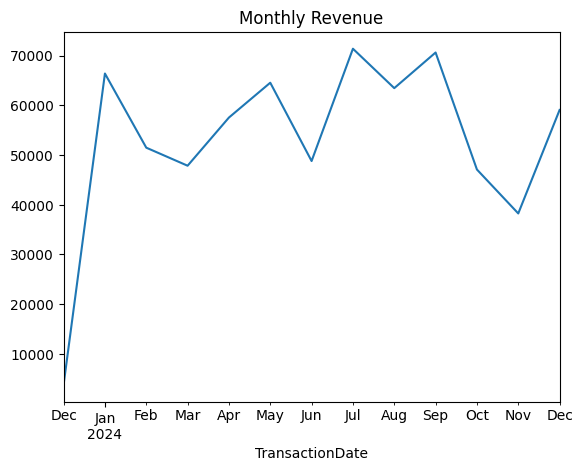

In [ ]:

# Revenue by Month
monthly_revenue = merged.groupby(merged["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
monthly_revenue.plot(kind="line", title="Monthly Revenue")
plt.show()

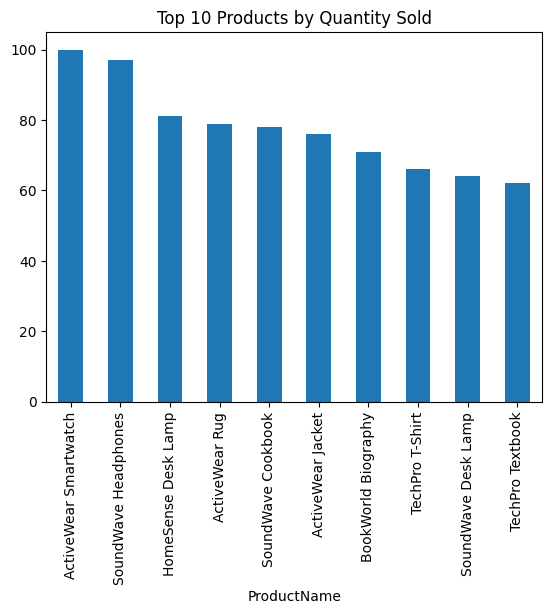

In [ ]:

# Top-Selling Products
top_products = merged.groupby("ProductName")["Quantity"].sum().nlargest(10)
top_products.plot(kind="bar", title="Top 10 Products by Quantity Sold")
plt.show()

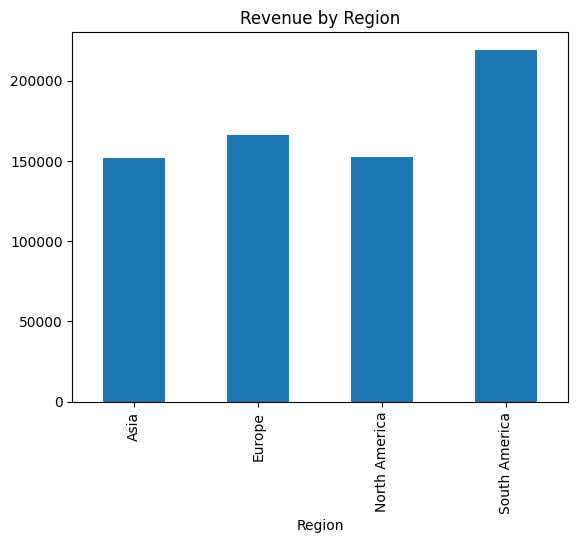

In [ ]:

# Revenue by Region
revenue_by_region = merged.groupby("Region")["TotalValue"].sum()
revenue_by_region.plot(kind="bar", title="Revenue by Region")
plt.show()
